Canvas Group: csmodel people

**HOMSSI, Yazan (S12)**

**MATA, Maria Sarah Althea (S12)**

**OLIVARES, Marc Yuri (S12)**

**TIENG, Eiden Bryce (S11)**

**VILLADAREZ, Jorel (S11)**

### Imports and Reading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for local import
pokedex_df = pd.read_csv('pokedex.csv')

In [ ]:
# for Google Drive import
from google.colab import drive

drive.mount('/content/gdrive/')

pokedex_df = pd.read_csv('/content/gdrive/MyDrive/CSMODEL MCO/pokedex.csv')

Mounted at /content/gdrive/


# **Dataset Description**
The dataset chosen is titled [Complete Pokemon Dataset (Updated 16.04.21)](https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420). It contains complete information about 1045 Pokemon, from their names and types to their stats, similar to the in-game Pokedex. This dataset was built with web data mining from popular Pokemon information websites, [Pokemon Database](https://pokemondb.net) and [Serebii.net](serebii.net). Each row is a different Pokemon/Pokemon variant, while each column represents the different stats and information of each Pokemon. The dataset contains 1045 rows, or 1045 observations/Pokemon, and 51 columns, or 51 variables/stats.

In [ ]:
# Count the number of observations in pokedex_df
num_observations = len(pokedex_df)
# Count the number of variables in pokedex_df
num_variables = pokedex_df.shape[1]

print("Number of observations:", num_observations)
print("Number of variables:", num_variables)

Number of observations: 1045
Number of variables: 51


## Variables
* *`pokedex_number`: entry number of the Pokemon in the National Pokedex
* *`name`: English name of the Pokemon
* `german_name`: German name of the Pokemon
* `japanese_name`: Original Japanese name of the Pokemon
* *`generation`: The numbered generation which the Pokemon was first introduced
* *`status`: denotes if a Pokemon is Normal, Sub-Legendary, Legendary, or Mythical
* `species`: Category of the Pokemon
* `type_number`: Number of types that the Pokemon has
* *`type_1`: Primary Type of the Pokemon
* *`type_2`: Secondary Type of the Pokemon if it has one
* *`height_m`: Height of the Pokemon in meters
* *`weight_kg`: Weight of the Pokemon in kilograms
* `abilities_number`: number of abilities of the Pokemon
* *`ability_?`: Name of the Pokemon's abilities
* *`ability_hidden`: Name of the hidden ability of the Pokemon if it has one
* *`total_points`: Total number of Base Points of the Pokemon
* *`hp`: Base HP of the Pokemon
* *`attack`: Base Attack of the Pokemon
* *`defense`: Base Defense of the Pokemon
* *`sp_attack`: Base Special Attack of the Pokemon
* *`sp_defense`: Base Special Defense of the Pokemon
* *`speed`: Base Speed of the Pokemon
* *`catch_rate`: Catch Rate of the Pokemon
* `base_friendship`: Base Friendship of the Pokemon
* *`base_experience`: Base experience of a wild Pokemon when caught
* *`growth_rate`: Growth Rate of the Pokemon
* `egg_type_number`: Number of groups where a Pokemon can hatch
* `egg_type_`?: Names of the egg groups where a Pokemon can hatch
* `percentage_male`: percentage of the species that are male. Blank if the Pokemon is genderless
* `egg_cycles`: The number of cycles (255-257 steps) required to hatch an egg of the Pokemon
* `against_?`: Eighteen features that denote the amount of damage taken against an attack of a particular type

*variables that will be used in the study.

# **Data Cleaning**

## **Checking**

### Summary of the Dataframe

A new dataframe called `study_df` will be made that contains only the variables that will be used in the study. Then, the new dataframe's general information will be shown. It displays every variable, the number of non-null entries in each variable, and its data type. We can use this to check for inconsistencies in count and data type.

In [ ]:
# Make an array of the names of the variables that will be used
variables = ['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2', 'height_m', 'weight_kg', 'ability_1', 'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_experience', 'growth_rate']

# Make a new dataframe using only those variables
study_df = pokedex_df[variables].copy()

study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   1045 non-null   int64  
 1   name             1045 non-null   object 
 2   generation       1045 non-null   int64  
 3   status           1045 non-null   object 
 4   type_1           1045 non-null   object 
 5   type_2           553 non-null    object 
 6   height_m         1045 non-null   float64
 7   weight_kg        1044 non-null   float64
 8   ability_1        1042 non-null   object 
 9   ability_2        516 non-null    object 
 10  ability_hidden   813 non-null    object 
 11  total_points     1045 non-null   int64  
 12  hp               1045 non-null   int64  
 13  attack           1045 non-null   int64  
 14  defense          1045 non-null   int64  
 15  sp_attack        1045 non-null   int64  
 16  sp_defense       1045 non-null   int64  
 17  speed         

We can see from the information above that there are variables that are incomplete when they should be complete, i.e., `catch_rate` and `base_experience`.

Other variables are incomplete because they are either optional or are exceptions.
* **Partner Pikachu**, **Partner Eevee**, and **Eternatus Eternamax** do not have values in `ability_1` because they naturally do not have abilities in-game.
* **Eternatus Eternamax** is the only Pokemon with no `weight_kg` value. [Pokemon Database](https://pokemondb.net/pokedex/eternatus) lists its weight as "—" while [Serebii.net](https://www.serebii.net/pokedex-swsh/eternatus/) lists it as "????kg"

The variables' data types are also all accurate, which means no data type cleaning is necessary.

We can check for formatting and spelling errors in the values of categorical variables.

In [ ]:
study_df['generation'].unique()

array([1, 8, 2, 3, 4, 5, 6, 7])

In [ ]:
study_df['status'].unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [ ]:
study_df['type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [ ]:
study_df['type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Normal', 'Psychic', 'Steel',
       'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

In [ ]:
study_df['growth_rate'].unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Fluctuating',
       'Erratic', nan], dtype=object)

There are no errors in the formatting and spelling of the values in categorical variables, except for `growth_rate`.

We can check for "suspicious values" like having `-1` as a default value.

In [ ]:
print(study_df[study_df['pokedex_number'] < 0])
print(study_df[study_df['pokedex_number'] > 1044])

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['height_m'] < 0])
print(study_df[study_df['height_m'] > 100]) # The tallest Pokemon is Eternatus Eternamax, at 100 meters

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['weight_kg'] < 0])
print(study_df[study_df['weight_kg'] > 999.9]) # The heaviest Pokemon are Cosmoem and Celesteela, both at 999.9 kg

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['total_points'] < 0])
print(study_df[study_df['total_points'] > 1125]) # The Pokemon with the highest stat total is Eternatus Eternamax, at 1125

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['hp'] < 0])
print(study_df[study_df['hp'] > 255]) # The Pokemon with the highest HP are Blissey and Eternatus Eternamax, at 255

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['attack'] < 0])
print(study_df[study_df['attack'] > 190]) # The Pokemon with the highest Attack is Mega Mewtwo X, at 190

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['defense'] < 0])
print(study_df[study_df['defense'] > 250]) # The Pokemon with the highest Defense is Eternatus Eternamax, at 250

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['sp_attack'] < 0])
print(study_df[study_df['sp_attack'] > 194]) # The Pokemon with the highest Special Attack is Mega Mewtwo Y, at 194

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['sp_defense'] < 0])
print(study_df[study_df['sp_defense'] > 250]) # The Pokemon with the highest Special Defense is Eternatus Eternamax, at 250

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['speed'] < 0])
print(study_df[study_df['speed'] > 200]) # The Pokemon with the highest Speed is Regieleki, at 200

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['catch_rate'] < 0])
print(study_df[study_df['catch_rate'] > 255]) # The highest possible Catch Rate is 255

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


In [ ]:
print(study_df[study_df['base_experience'] < 0])
print(study_df[study_df['base_experience'] > 608]) # The Pokemon with the highest Base Experience is Blissey, at 608

Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


All of the DataFrames to catch Suspicious Values came up empty.

We can also check for duplicate values within variables that should have unique entries.

In [ ]:
# Check for duplicates in the 'name' column
name_duplicates = study_df.duplicated(subset=['name'], keep=False)

# Display rows with duplicate names
name_duplicates_df = study_df[name_duplicates]
print(name_duplicates_df[['pokedex_number', 'name']])

Empty DataFrame
Columns: [pokedex_number, name]
Index: []


There are no duplicate entries in the `name` column.

## **Cleaning**

### Cleaning `catch_rate`

The summary showed that there are only 1027 non-null counts for `catch_rate`, when it should be complete at 1045.

In [ ]:
# Mask Pokemon with missing catch_rate
no_catch_rate_mask = study_df['catch_rate'].isnull()
# Make a new df out of rows with no catch_rate
no_catch_rate_df = study_df[no_catch_rate_mask]
no_catch_rate_subset = no_catch_rate_df[['name', 'catch_rate']]
no_catch_rate_subset

,name,catch_rate
69,Galarian Meowth,NaN
100,Galarian Ponyta,NaN
102,Galarian Rapidash,NaN
111,Galarian Farfetch'd,NaN
144,Galarian Weezing,NaN
158,Galarian Mr. Mime,NaN
273,Galarian Corsola,NaN
320,Galarian Zigzagoon,NaN
322,Galarian Linoone,NaN
654,Galarian Darumaka,NaN


Most of the Pokemon with no `catch_rate` are Galarian Pokemon. Pokemon Database shows that [Galarian Pokemon have the same catch rate as their regular counterparts](https://pokemondb.net/pokedex/meowth).

![](https://drive.google.com/uc?export=view&id=133_v07tVUzJKlkbYSRP5xYkIP0jpOJTX)

![](https://drive.google.com/uc?export=view&id=1eZu2dmbCahuIOHC0aVnerNS5zYIVvyQf)

That means, we can copy the `catch_rate` of the regular Pokemon to their Galarian counterparts with missing values.

In [ ]:
# Mask Galarian Pokemon with missing catch_rate
galarian_no_catch_rate_mask = study_df['catch_rate'].isnull() & study_df['name'].str.contains('Galarian')

for index, galarian_pokemon in study_df[galarian_no_catch_rate_mask].iterrows():
    # Extract the base name (without "Galarian")
    base_name = galarian_pokemon['name'].replace('Galarian ', '')

    # Check if the base name matches with a Pokemon
    if not pd.isnull(study_df.loc[study_df['name'] == base_name, 'catch_rate']).all():
        # Copy the catch_rate from the regular Pokemon to the Galarian counterpart
        study_df.loc[index, 'catch_rate'] = study_df.loc[study_df['name'] == base_name, 'catch_rate'].values[0]

# Mask Pokemon with missing catch_rate
no_catch_rate_mask = study_df['catch_rate'].isnull()
# Make a new df out of rows with no catch_rate
no_catch_rate_df = study_df[no_catch_rate_mask]
no_catch_rate_subset = no_catch_rate_df[['name', 'catch_rate']]
no_catch_rate_subset

,name,catch_rate
1017,Morpeko Hangry Mode,NaN
1029,Zacian Hero of Many Battles,NaN
1031,Zamazenta Hero of Many Battles,NaN
1033,Eternatus Eternamax,NaN


**Morpeko Hangry Mode** is a variant of **Morpeko Full Belly Mode**, and [they both have the same catch rates](https://pokemondb.net/pokedex/morpeko). The same goes for [Zacian Hero of Many Battles](https://pokemondb.net/pokedex/zacian) (with its Crowned Hero form) and [Zamazenta Hero of Many Battles](https://pokemondb.net/pokedex/zamazenta) (with its Crowned Shield form). We will fill their `catch_rate` values similarly to what we did with Galarian Pokemon.

In [ ]:
# Map the variants with no catch_rate to their counterparts
variants_mapping = {
    'Morpeko Hangry Mode': 'Morpeko Full Belly Mode',
    'Zacian Hero of Many Battles': 'Zacian Crowned Sword',
    'Zamazenta Hero of Many Battles': 'Zamazenta Crowned Shield'
}

# Mask Pokemon with missing catch_rate for the specified variants
variant_no_catch_rate_mask = study_df['catch_rate'].isnull() & study_df['name'].isin(variants_mapping.keys())

for index, variant_pokemon in study_df[variant_no_catch_rate_mask].iterrows():
    # Extract the counterpart name from the variants_mapping
    counterpart_name = variants_mapping.get(variant_pokemon['name'])

    # Check if the counterpart name matches with a Pokemon
    if not pd.isnull(study_df.loc[study_df['name'] == counterpart_name, 'catch_rate']).all():
        # Copy the catch_rate from the counterpart Pokemon to the variant
        study_df.loc[index, 'catch_rate'] = study_df.loc[study_df['name'] == counterpart_name, 'catch_rate'].values[0]

# Mask Pokemon with missing catch_rate
no_catch_rate_mask = study_df['catch_rate'].isnull()
# Make a new df out of rows with no catch_rate
no_catch_rate_df = study_df[no_catch_rate_mask]
no_catch_rate_subset = no_catch_rate_df[['name', 'catch_rate']]
no_catch_rate_subset

,name,catch_rate
1033,Eternatus Eternamax,NaN


The only Pokemon left is **Eternatus** in its Eternamax form. This Pokemon does not have a catch rate since it is unobtainable.

### Cleaning `base_experience`

The summary showed that there are only 925 non-null counts for `base_experience`, when it should be complete at 1045.

In [ ]:
# Mask Pokemon with missing base_experience
no_base_experience_mask = study_df['base_experience'].isnull()
# Make a new df out of rows with no base_experience
no_base_experience_df = study_df[no_base_experience_mask]
no_base_experience_df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,growth_rate
69,52,Galarian Meowth,1,Normal,Steel,NaN,0.4,7.5,Pickup,Tough Claws,...,290,50,65,55,40,40,40,255.0,NaN,Medium Fast
100,77,Galarian Ponyta,1,Normal,Psychic,NaN,0.8,24.0,Run Away,Pastel Veil,...,410,50,85,55,65,65,90,190.0,NaN,Medium Fast
102,78,Galarian Rapidash,1,Normal,Psychic,Fairy,1.7,80.0,Run Away,Pastel Veil,...,500,65,100,70,80,80,105,60.0,NaN,Medium Fast
107,80,Galarian Slowbro,8,Normal,Poison,Psychic,1.6,70.5,Quick Draw,Own Tempo,...,490,95,100,95,100,70,30,75.0,NaN,Medium Fast
111,83,Galarian Farfetch'd,1,Normal,Fighting,NaN,0.8,42.0,Steadfast,NaN,...,377,52,95,55,58,62,55,45.0,NaN,Medium Fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,Sub Legendary,Ice,NaN,2.2,800.0,Chilling Neigh,NaN,...,580,100,145,130,65,110,30,3.0,NaN,Slow
1041,897,Spectrier,8,Sub Legendary,Ghost,NaN,2.0,44.5,Grim Neigh,NaN,...,580,100,65,60,145,80,130,3.0,NaN,Slow
1042,898,Calyrex,8,Legendary,Psychic,Grass,1.1,7.7,Unnerve,NaN,...,500,100,80,80,80,80,80,3.0,NaN,Slow
1043,898,Calyrex Ice Rider,8,Legendary,Psychic,Ice,2.4,809.1,As One,NaN,...,680,100,165,150,85,130,50,3.0,NaN,Slow


A lot of the Pokemon with no `base_experience` are Galarian Pokemon. Pokemon Database shows that [Galarian Pokemon have the same base experience as their regular counterparts](https://pokemondb.net/pokedex/ponyta). This means we can copy the `base_experience` of the regular Pokemon to their Galarian counterparts with missing values.

In [ ]:
# Mask Galarian Pokemon with missing base_experience
galarian_no_base_experience_mask = study_df['base_experience'].isnull() & study_df['name'].str.contains('Galarian')

for index, galarian_pokemon in study_df[galarian_no_base_experience_mask].iterrows():
    # Extract the base name (without "Galarian")
    base_name = galarian_pokemon['name'].replace('Galarian ', '')

    # Check if the base name matches with a Pokemon
    if not pd.isnull(study_df.loc[study_df['name'] == base_name, 'base_experience']).all():
        # Copy the base_experience from the regular Pokemon to the Galarian counterpart
        study_df.loc[index, 'base_experience'] = study_df.loc[study_df['name'] == base_name, 'base_experience'].values[0]

# Mask Pokemon with missing base_experience
no_base_experience_mask = study_df['base_experience'].isnull()
# Make a new df out of rows with no base_experience
no_base_experience_df = study_df[no_base_experience_mask]
no_base_experience_df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,growth_rate
944,808,Meltan,7,Mythical,Steel,NaN,0.2,8.0,Magnet Pull,NaN,...,300,46,65,65,55,35,34,3.0,NaN,Slow
945,809,Melmetal,7,Mythical,Steel,NaN,2.5,800.0,Iron Fist,NaN,...,600,135,143,143,80,65,34,3.0,NaN,Slow
946,810,Grookey,8,Normal,Grass,NaN,0.3,5.0,Overgrow,NaN,...,310,50,65,50,40,40,65,45.0,NaN,Medium Slow
947,811,Thwackey,8,Normal,Grass,NaN,0.7,14.0,Overgrow,NaN,...,420,70,85,70,55,60,80,45.0,NaN,Medium Slow
948,812,Rillaboom,8,Normal,Grass,NaN,2.1,90.0,Overgrow,NaN,...,530,100,125,90,60,70,85,45.0,NaN,Medium Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,Sub Legendary,Ice,NaN,2.2,800.0,Chilling Neigh,NaN,...,580,100,145,130,65,110,30,3.0,NaN,Slow
1041,897,Spectrier,8,Sub Legendary,Ghost,NaN,2.0,44.5,Grim Neigh,NaN,...,580,100,65,60,145,80,130,3.0,NaN,Slow
1042,898,Calyrex,8,Legendary,Psychic,Grass,1.1,7.7,Unnerve,NaN,...,500,100,80,80,80,80,80,3.0,NaN,Slow
1043,898,Calyrex Ice Rider,8,Legendary,Psychic,Ice,2.4,809.1,As One,NaN,...,680,100,165,150,85,130,50,3.0,NaN,Slow


There are still 101 Pokemon with missing `base_experience` values. It would be too time consuming to check all of these and fill them out individually. It is also unlike the case with `catch_rate`, where the Pokemon with missing values are variants of ones with complete values. It can also be observed that all 99 8th Generation Pokemon have missing values.

It is debatable to simply remove all these Pokemon and instead make this study about all Pokemon from Gen I to Gen VII, but it is much preferred to keep them in. Instead, all of the missing values will be imputed with the median `base_experience` value of the dataframe.

In [ ]:
# Get the median of non-null base_experience values
median_base_experience = study_df['base_experience'].median()
print("Median Base Experience:", median_base_experience)

# Imput missing base_experience values with the median
study_df['base_experience'].fillna(median_base_experience, inplace=True)

# Mask Pokemon with missing base_experience
no_base_experience_mask = study_df['base_experience'].isnull()
# Make a new df out of rows with no base_experience
no_base_experience_df = study_df[no_base_experience_mask]
print("\nNo Base Experience subset:")
print(no_base_experience_df)

Median Base Experience: 159.0

No Base Experience subset:
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


### Cleaning `growth_rate`

The summary showed that there are only 1044 non-null counts for `growth_rate`, when it should be complete at 1045.

In [ ]:
# Mask Pokemon with missing growth_rate
no_growth_rate_mask = study_df['growth_rate'].isnull()
# Make a new df out of rows with no growth_rate
no_growth_rate_df = study_df[no_growth_rate_mask]
no_growth_rate_df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,growth_rate
658,555,Galarian Darmanitan Zen Mode,5,Normal,Ice,Fire,1.7,120.0,Gorilla Tactics,NaN,...,540,105,160,55,30,55,135,60.0,189.0,NaN


The only Pokemon with a missing `growth_rate` value is Galarian Darmanitan Zen Mode. According to [Pokemon Database](https://pokemondb.net/pokedex/darmanitan), its growth rate is Medium Slow. We can simply set its growth rate to the correct value.

In [ ]:
study_df.loc[study_df['name'] == 'Galarian Darmanitan Zen Mode', 'growth_rate'] = 'Medium Slow'

# Mask Pokemon with missing growth_rate
no_growth_rate_mask = study_df['growth_rate'].isnull()
# Make a new df out of rows with no growth_rate
no_growth_rate_df = study_df[no_growth_rate_mask]
print("No Growth Rate subset:")
print(no_growth_rate_df)

No Growth Rate subset:
Empty DataFrame
Columns: [pokedex_number, name, generation, status, type_1, type_2, height_m, weight_kg, ability_1, ability_2, ability_hidden, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, base_experience, growth_rate]
Index: []

[0 rows x 21 columns]


# **Exploratory Data Analysis**

## **Question 1:** What is the distribution of Pokemon Primary Types in the dataset?

### Numerical Summary

The distribution of Pokémon Primary Types in the dataset is quantitatively assessed, revealing insights into the diversity and representation of types among the total of 1,045 Pokémon. The analysis employs various statistical measures to elucidate the central tendency and spread of Pokémon counts across different types.

Total Number of Pokémon: 1,045

* Central Tendency:
  * Mean (Average) Number of Pokémon per Type: 58.06. This statistic represents the average count of Pokémon for each primary type, providing an understanding of the typical size of type groups within the Pokémon universe.
  * Median Number of Pokémon per Type: 44. This measure indicates the midpoint in the distribution of Pokémon counts per type, offering insight into the central tendency of the data that is less affected by outliers.
  * Mode Number of Pokémon per Type: 41. The mode reveals the most common count of Pokémon across types, highlighting the predominant group size in the dataset.

* Spread:
  * Standard Deviation: 32.07. This value quantifies the variation or dispersion of Pokémon counts from the mean across types, indicating how spread out the Pokémon types are in terms of their numbers.
  * Maximum Count of Pokémon in a Type: 134 (for Water type), and Minimum Count of Pokémon in a Type: 8 (for Flying type). These figures demonstrate the range of Pokémon counts from the most to the least populous types, underscoring the diversity in type distribution.
  * Range: 126. The range, calculated as the difference between the maximum and minimum counts, provides a simplistic yet effective measure of the overall spread across Pokémon types, illustrating the disparity in representation from the most common to the rarest types.







In [ ]:
# Count the occurrences of each Pokemon type
type_counts = study_df['type_1'].value_counts()

# Display the numerical summary
type_counts

type_1
Water       134
Normal      115
Grass        91
Bug          81
Psychic      81
Fire         65
Electric     62
Rock         60
Dark         46
Ghost        42
Fighting     42
Poison       41
Ground       41
Dragon       41
Ice          37
Steel        36
Fairy        22
Flying        8
Name: count, dtype: int64

The numerical summary provides a snapshot of the distribution and diversity of Pokemon across their primary types in the dataset. With a total of 1045 Pokemon spread over 18 types, the dataset showcases a wide range of populations per type, from the water-dominant group with 134 Pokemon to the relatively scarce flying category with just 8. The mean and median values, sitting at 58.06 and 44 respectively, offer insights into the central tendency of the data, suggesting that while some types are densely populated, others are less common. The mode of 41 further highlights the frequency of this particular count across different types.

The standard deviation of 32.07 points to the significant variability in the number of Pokemon per type, underscoring the game designers' efforts to create a balanced yet diverse universe. The substantial range of 126 between the most and least populous types reflects the strategic choices made in the distribution of Pokemon types, affecting gameplay dynamics and player strategies. This diversity not only enriches the Pokemon universe but also ensures a varied and engaging experience for players, encouraging exploration and experimentation with different Pokemon combinations.

### Visualization

The bar chart visualizing the distribution of Pokemon primary types presents a clear and concise comparison across 18 types, with the number of Pokemon depicted along the vertical axis and the types along the horizontal axis. Each type is represented by a blue bar, with their heights indicating the count of Pokemon in each category. The chart is titled "Distribution of Pokemon Primary Types," guiding viewers to understand the variety and prevalence of each type at a glance. Notably, the Water type bar stands out as the tallest, showing it as the most populous, whereas the Flying type has the shortest bar, marking it as the rarest. This visualization effectively communicates the diversity and disparities within the Pokemon universe, making it easy to identify which types are more or less common.

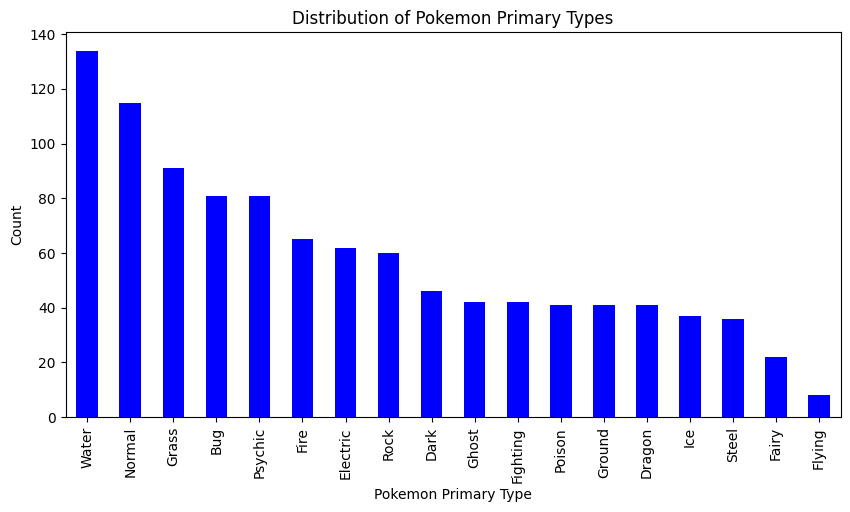

In [ ]:
# Plot a bar chart for Pokemon types
plt.figure(figsize=(10, 5))
type_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Pokemon Primary Types')
plt.xlabel('Pokemon Primary Type')
plt.ylabel('Count')
plt.show()

## **Question 2:** Is there a relationship between a Pokemon's Legendary status and its stats?

### Numerical Summary

The numerical summary delves into the distribution of base stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Catch Rate, Base Experience) across Pokémon with different legendary statuses. By employing statistical measures, it contrasts the central tendency and spread of these stats among Pokémon classified under 'Non Legendary' and other legendary categories.

* Central Tendency:
  * Mean: Represents the average value of each base stat for Pokémon within each legendary status category. It sheds light on the "typical" stat value for Pokémon, offering insights into the expected performance metrics of a Pokémon based on its legendary classification.
  * Median: Indicates the middle value of a particular stat among Pokémon in each legendary status category when ordered. This metric is crucial for understanding the central point of the data distribution, especially in scenarios where the data might be skewed, ensuring that outlier values do not disproportionately influence the perception of "average" performance.

* Spread:
  * Standard Deviation (Std): Measures the variability or dispersion of the base stat values around the mean within each legendary status. A higher standard deviation denotes a broader range of values, suggesting that Pokémon within that category exhibit a wide variety of strengths and weaknesses. Conversely, a lower standard deviation indicates that the Pokémon stats are more tightly clustered around the mean, implying more consistency in their attributes.
  * Range: Although not directly calculated in the initial step, the range can be derived from the maximum and minimum values of each stat within the categories. It highlights the difference between the strongest and weakest stat values among Pokémon, providing a quick glimpse into the potential variability and extremes present within each legendary status group.

In [ ]:
# Create a copy of the DataFrame
subset_df = study_df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_experience', 'status', 'total_points']].copy()

# Map 'Mythical', 'Normal', and 'Sub Legendary' to a common category 'Non Legendary'
subset_df['legendary_status'] = subset_df['status'].apply(lambda x: 'Non Legendary' if x in ['Mythical', 'Normal', 'Sub Legendary'] else x)

# Drop the original 'status' column as it's no longer needed
subset_df.drop('status', axis=1, inplace=True)

# Calculate summary statistics for each stat grouped by 'legendary_status'
summary_stats_by_legendary_status = subset_df.groupby('legendary_status').agg(['mean', 'median', 'std'])

# Display the numerical summary
summary_stats_by_legendary_status

hp                        attack                    \
                        mean median        std        mean median        std   
legendary_status                                                               
Legendary         110.619048  100.0  36.495875  124.619048  125.0  35.352547   
Non Legendary      68.369890   65.0  24.796533   78.628116   75.0  30.979619   

                     defense                     sp_attack  ...      speed  \
                        mean median        std        mean  ...        std   
legendary_status                                            ...              
Legendary         107.857143  100.0  32.504087  121.642857  ...  26.487216   
Non Legendary      73.281157   70.0  30.443146   70.996012  ...  29.637807   

                 catch_rate                   base_experience         \
                       mean median        std            mean median   
legendary_status                                                       
Legendary         23.243902    3.0  55.398006      266.714286  306.0   
Non Legendary     95.767697   60.0  75.297963      149.496510  159.0   

                            total_points                     
                        std         mean median         std  
legendary_status                                             
Legendary         77.946600   675.309524  680.0  125.532716  
Non Legendary     71.249882   429.472582  452.0  111.489212  

[2 rows x 27 columns]

The numerical summary underscores the distinct gap between Legendary and Non-Legendary Pokémon in terms of battle capabilities and rarity. Legendary Pokémon are designed to be more powerful and challenging to catch, which is reflected in their higher stats across the board and lower catch rates. Their elevated base experience points further highlight their value and the challenge they present to trainers. This data is instrumental in understanding the intrinsic value and designed role of Legendary Pokémon within the game's ecosystem, emphasizing their status as formidable opponents and valuable assets to any trainer's team.

### Visualization

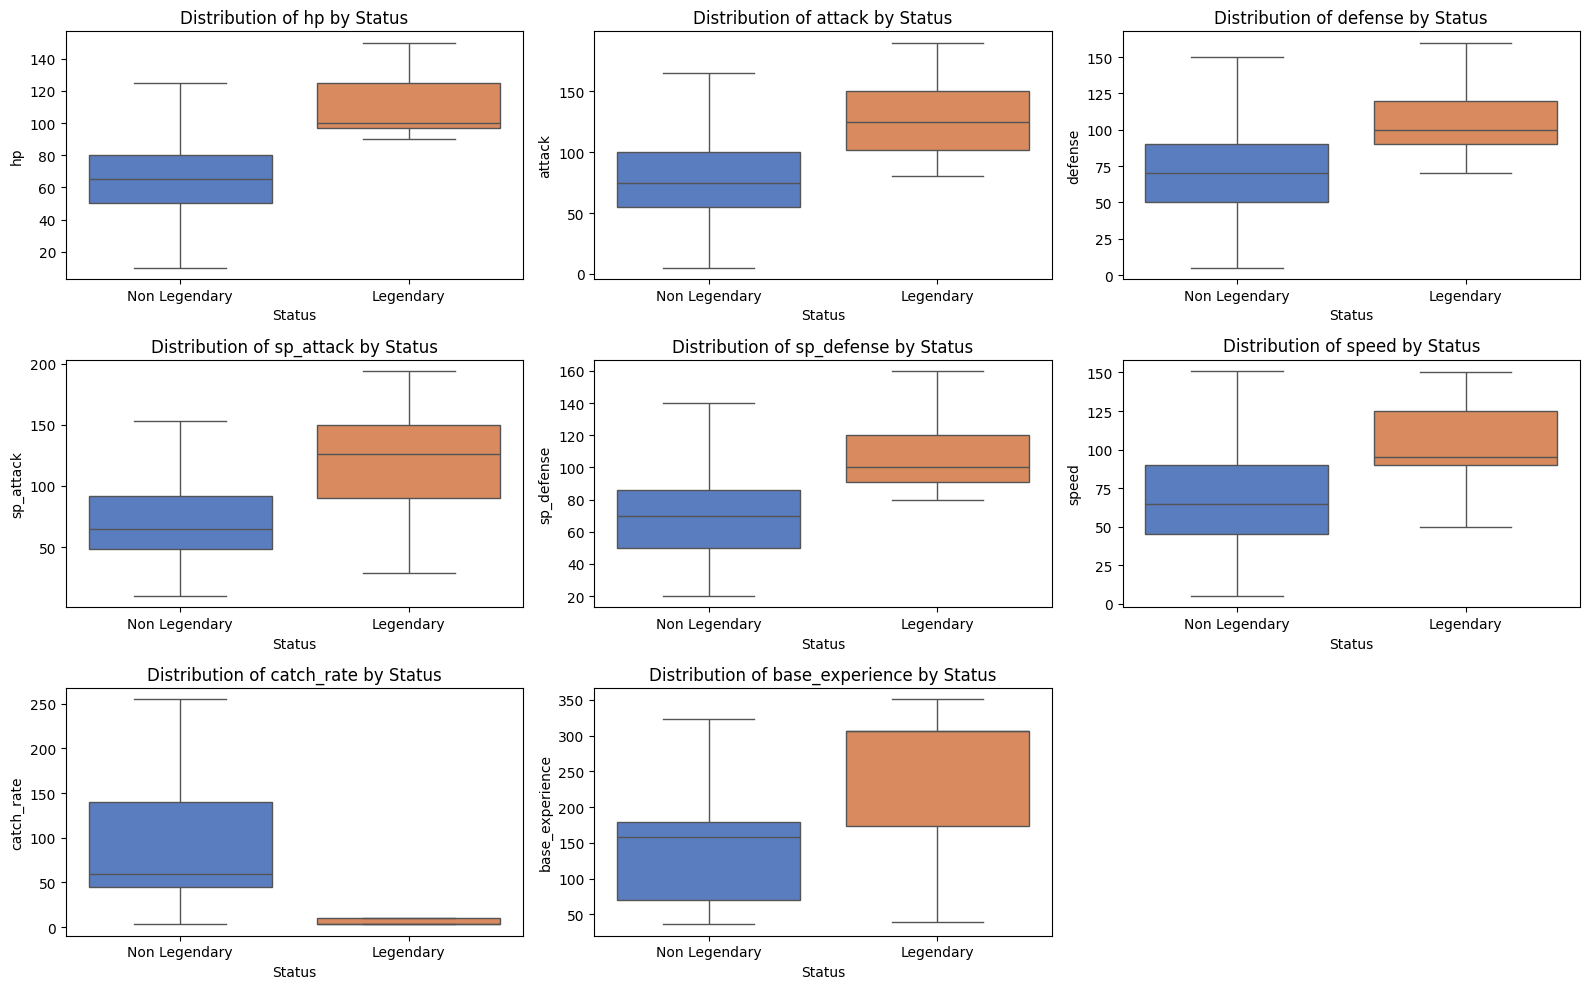

In [ ]:
# Create a copy of the DataFrame
subset_df = study_df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_experience', 'status']].copy()

# Map 'Normal', 'Sub Legendary', and 'Mythical' to 'Non Legendary'
subset_df['status'] = subset_df['status'].apply(lambda x: 'Non Legendary' if x in ['Normal', 'Sub Legendary', 'Mythical'] else x)

# Create box plots for each stat grouped by 'status'
plt.figure(figsize=(16, 10))
for i, stat in enumerate(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_experience']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='status', y=stat, data=subset_df, palette='muted', hue='status', showfliers=False, legend=False)
    plt.title(f'Distribution of {stat} by Status')
    plt.xlabel('Status')
    plt.ylabel(stat)

plt.tight_layout()
plt.show()

Box plots are used to visualize the distribution of various Pokémon statistics, such as HP, Attack, Defense, Special Attack, Special Defense, Speed, Catch Rate, and Base Experience, categorized by their Legendary status. Each box plot represents the distribution of a specific statistic, comparing the values between Legendary and Non-Legendary Pokémon. Box plots are particularly effective for showcasing the central tendency, spread, and outliers of a dataset, making them ideal for comparing distributions across different groups, as in this case with Legendary and Non-Legendary Pokémon. Through the use of box plots, the visualization offers a comprehensive and easily interpretable comparison of key attributes between these two categories of Pokémon.

## **Question 3:** How does the distribution of base stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) differ across generations?

### Numerical Summary

The numerical summary explores how the distribution of base stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) varies across generations in the Pokemon dataset. It utilizes various statistical measures to compare the central tendency and spread of these stats for Pokemon introduced in each generation.



*   Central Tendency:
 *   Mean: This signifies the average value of each base stat for Pokemon within a specific generation. It provides an understanding of the "typical" stat value for Pokemon introduced in that generation.
 *   Median: This represents the middle value when Pokemon in a generation are ordered by a particular stat. It is particularly useful when the data is skewed, as the mean can be influenced by outliers.

*   Spread:
 *   Standard Deviation: This measures how spread out the data points are around the mean for each stat within a generation. A higher standard deviation indicates a wider range of stat values, while a lower value suggests the data points are closer to the mean.
 *   Range: This calculates the difference between the highest and lowest values of each stat in each generation. It reveals the overall spread of the data but can be sensitive to extreme values.

In [ ]:
selected_columns = ["generation", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
dist_df = study_df[selected_columns].copy()

# Function to calculate central tendency and dispersion measures
def calculate_stats(data, stat_name):
  return {
      "mean": data.mean(),
      "median": data.median(),
      "std": data.std(),
      "range": data.max() - data.min()
  }

# Create an empty dictionary to store statistics for each generation and stat
stats_by_generation = {}

# Loop through each generation and calculate statistics for all stats
for generation in dist_df["generation"].unique():
  generation_data = dist_df.loc[dist_df["generation"] == generation]
  stats_by_generation[generation] = {}
  for stat in selected_columns[1:]:
    stats_by_generation[generation][stat] = calculate_stats(generation_data[stat], stat)

# Print the calculated statistics
print("Statistics by generation:")
for generation, stat_data in stats_by_generation.items():
  print(f"\nGeneration {generation}:")
  for stat, stats in stat_data.items():
    print(f"\t{stat}:")
    print(f"\t\tMean: {stats['mean']}")
    print(f"\t\tMedian: {stats['median']}")
    print(f"\t\tStandard Deviation: {stats['std']}")
    print(f"\t\tRange: {stats['range']}")

Statistics by generation:

Generation 1:
	hp:
		Mean: 64.76041666666667
		Median: 60.5
		Standard Deviation: 27.347767998232793
		Range: 240
	attack:
		Mean: 77.30208333333333
		Median: 75.0
		Standard Deviation: 29.610426843190744
		Range: 185
	defense:
		Mean: 71.00520833333333
		Median: 66.0
		Standard Deviation: 28.591086626977713
		Range: 175
	sp_attack:
		Mean: 69.92708333333333
		Median: 65.0
		Standard Deviation: 33.67825740466702
		Range: 184
	sp_defense:
		Mean: 68.59895833333333
		Median: 70.0
		Standard Deviation: 24.904016769695417
		Range: 110
	speed:
		Mean: 72.51041666666667
		Median: 70.0
		Standard Deviation: 29.856198034612923
		Range: 135

Generation 8:
	hp:
		Mean: 75.2
		Median: 70.0
		Standard Deviation: 31.474165229964033
		Range: 230
	attack:
		Mean: 83.57142857142857
		Median: 85.0
		Standard Deviation: 31.677721224513952
		Range: 150
	defense:
		Mean: 76.96190476190476
		Median: 70.0
		Standard Deviation: 32.722588002292326
		Range: 230
	sp_attack:
		Mean: 74

Comparing these statistics across generations, we can gain insights into how the average and distribution of base stats have changed over time. For instance, we might observe if the average HP (mean) for Pokemon increases or decreases with each generation, or if the range of Speed values becomes wider or narrower across generations.

### Visualization

The visualization would employ box plots to effectively portray the distribution of each base stat (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) across generations. Each box plot would represent the distribution of a specific stat for Pokemon introduced in each generation.



*   X-axis: This axis would represent the different generations of Pokemon.
*   Y-axis: This axis would represent the values of each base stat.
*   Box: The box in each plot would depict the interquartile range (IQR), which encompasses the middle 50% of the data points. The bottom and top edges of the box represent the first and third quartiles (Q1 and Q3), respectively.
*   Median: The line inside the box indicates the median value, which divides the data into two halves with an equal number of data points above and below it.
*   Whiskers: The whiskers extend from the top and bottom of the box, typically up to 1.5 times the IQR. They represent the range of data points that fall outside the interquartile range but are not considered outliers.
*   Outliers: Data points beyond the whiskers are considered outliers and are depicted as individual points outside the box plot.

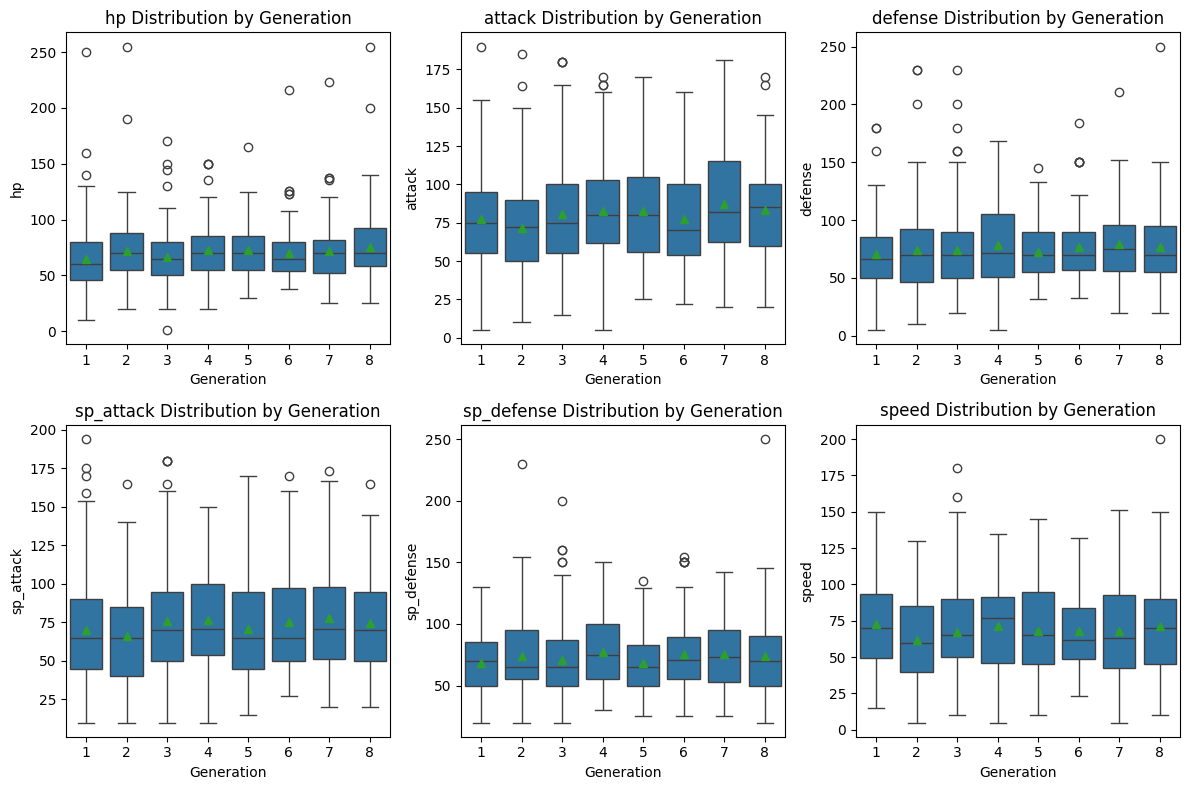

In [ ]:
# Create a figure
plt.figure(figsize=(12, 8))

# Loop through each base stat
for i, stat in enumerate(selected_columns[1:], 1):
  # Create a subplot for each stat
  ax = plt.subplot(2, 3, i)
  sns.boxplot(
      x="generation",
      y=stat,
      showmeans=True,
      data=dist_df
  )
  # Set plot title and labels
  ax.set_title(f"{stat} Distribution by Generation")
  ax.set_xlabel("Generation")
  ax.set_ylabel(stat)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


By examining the box plots, we can visually compare the central tendency (median) and spread (IQR and whiskers) of each base stat across different generations. This allows for an easier identification of trends and potential changes in the distribution of these stats throughout the Pokemon franchise's history.explain

## **Question 4:** Is there a relationship between a Pokemon's generation and its stats?

### Numerical Summary


Statistical measures like central tendency (mean, median, mode) and spread (standard deviation, range) offer key insights into Pokémon stats, revealing patterns in strength and diversity across generations. The mean shows the average stat value, highlighting overall trends in Pokémon power. The median points to the central value, helping identify typical strengths, while the mode indicates the most common stat, shedding light on prevalent characteristics. Standard deviation and range explore the variability among Pokémon, with high values indicating a wide range of abilities and suggesting rich strategic diversity in the game. Together, these statistics provide a nuanced view of Pokémon attributes, enhancing our understanding of their evolution and impact on gameplay.

* Central Tendency
  * Mean: The average value of each stat provides a general idea of the typical stat value for Pokémon in the dataset or within specific categories (e.g., generations, legendary status). A higher mean in stats like HP, Attack, or  Speed for certain generations might indicate that Pokémon from those generations are generally stronger or faster on average.
  * Median: The median gives an insight into the middle value of the dataset for each stat, helping to understand the distribution by indicating the point at which half of the observations fall above and half fall below. This is particularly useful in skewed distributions where the mean might be misleading.
  * Mode: The most frequently occurring value in the dataset for each stat. While not always applicable to continuous data like Pokémon stats, the mode can be useful in categorical data or discrete data analyses.
* Spread
  * Standard Deviation: This measures the amount of variation or dispersion of a set of values. A high standard deviation for a stat across generations could suggest that there is a wide variety of strengths and weaknesses among Pokémon in that generation, indicating diverse game design and strategy.
  * Range: The difference between the highest and lowest values. A wide range in stats like Attack or Defense could indicate the presence of both very powerful and very weak Pokémon within a generation or category, highlighting the diversity in Pokémon characteristics.


In [ ]:
selected_columns = ["generation", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
rel_df = study_df[selected_columns]

def calculate_stats(data, stat_name):
    return {
        "mean": data.mean(),
        "median": data.median(),
        "std": data.std(),
        "range": data.max() - data.min()
    }


stats_by_stat = {}


for stat in selected_columns[1:]:
    stats_by_stat[stat] = calculate_stats(rel_df[stat], stat)


print("Overall Statistics:")
for stat, stats in stats_by_stat.items():
    print(f"{stat}:")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Median: {stats['median']}")
    print(f"  Standard Deviation: {stats['std']:.2f}")
    print(f"  Range: {stats['range']}")


Overall Statistics:
hp:
  Mean: 70.07
  Median: 68.0
  Standard Deviation: 26.67
  Range: 254
attack:
  Mean: 80.48
  Median: 77.0
  Standard Deviation: 32.43
  Range: 185
defense:
  Mean: 74.67
  Median: 70.0
  Standard Deviation: 31.26
  Range: 245
sp_attack:
  Mean: 73.03
  Median: 65.0
  Standard Deviation: 32.75
  Range: 184
sp_defense:
  Mean: 72.30
  Median: 70.0
  Standard Deviation: 28.10
  Range: 230
speed:
  Mean: 68.81
  Median: 65.0
  Standard Deviation: 30.21
  Range: 195


**Across Generations:** If the mean and median values of stats such as HP, Attack, and Speed gradually increase across generations, this could suggest that newer Pokémon are designed to be stronger or faster, possibly reflecting changes in game design philosophy or an intention to keep the game challenging for players.

**Legendary Status:** A significantly higher mean and lower standard deviation in stats for Legendary Pokémon compared to Non-Legendary ones would highlight their intended role as exceptionally powerful creatures within the game. The lower standard deviation suggests that Legendary Pokémon consistently maintain high stats, underscoring their rarity and strength.

**Predicting Generation:** If certain generations have distinctive statistical signatures—such as a particular generation having consistently higher Speed stats—this could potentially be used as a predictive feature in modeling. However, significant overlap in the range and standard deviation of stats across generations might indicate that predicting a Pokémon's generation based on stats alone could be challenging without more distinct or additional features.

### Visualization

The box plot offers a concise visual representation of how Pokémon stats vary across different generations. Each box illustrates the distribution of stats, with the line inside representing the median value. The whiskers show the range of the data, while outliers are indicated as individual points beyond the whiskers. This visualization facilitates a comparative analysis of stats between generations, aiding in identifying trends and potential patterns that may assist in predicting a Pokémon's generation based on its stats.

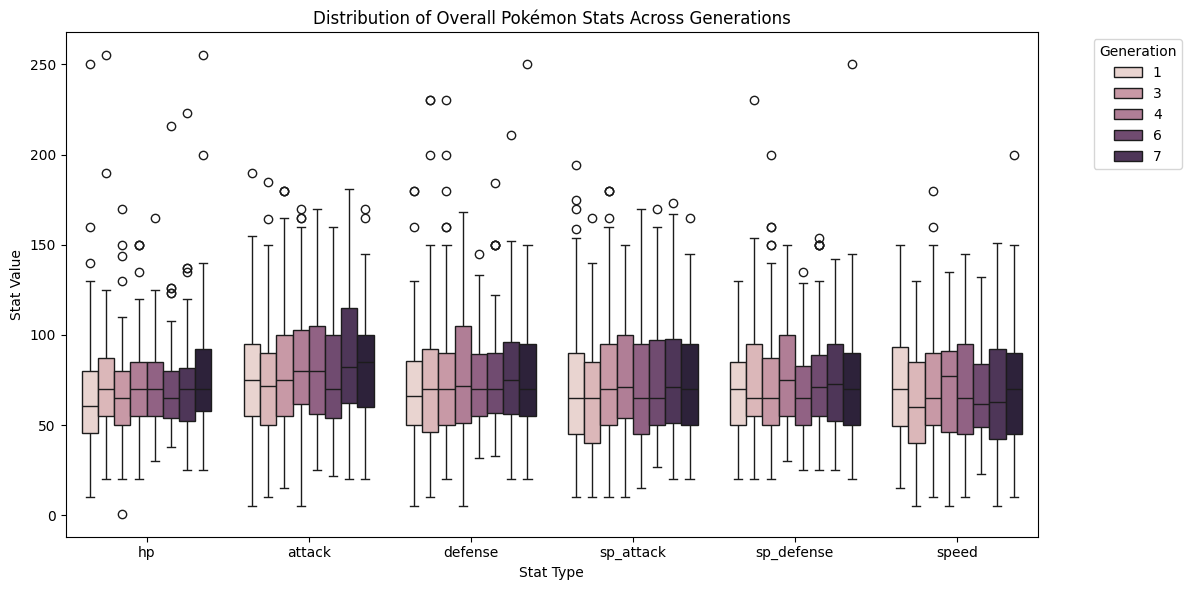

In [ ]:
melted_df = study_df.melt(id_vars=["generation"], value_vars=["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"],
                    var_name="Stat", value_name="Value")

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x="Stat", y="Value", hue="generation")
plt.title("Distribution of Overall Pokémon Stats Across Generations")
plt.ylabel("Stat Value")
plt.xlabel("Stat Type")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


The box plot visualization succinctly illustrates the evolution and variability of Pokémon stats—HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed—across generations. It reveals trends in stat distribution, such as increases or decreases in median values, indicating shifts in gameplay strategy or game design over time. By comparing stats within generations, it highlights which attributes are emphasized and the strategic diversity offered by the Pokémon roster. Outliers point to exceptional Pokémon that deviate from the norm, showcasing design choices for unique gameplay experiences. The spread and range of the box plots reflect the diversity of Pokémon strengths and weaknesses within each generation, underscoring the series' evolving complexity and depth. This visualization offers valuable insights into the strategic and design philosophies guiding the Pokémon series, making it a useful tool for players and enthusiasts alike to understand the dynamics at play across different eras of the franchise.

# **Research Question: Can we predict a Pokémon's generation based on its stats?**


This research question extends the EDA's questions exploration into predictive modeling. We will be taking the exploration into stats and generations further by attempting predictions based on observed patterns within these variables.

Our exploration revealed that throughout the years, there have been trends of changes in stats between generations, such as increases or decreases in median values, indicating shifts in game development and design philosophies over time. We compared stats within generations and it highlighted which attributes are emphasized and the difference of intended strategies per generation.

This research question is significant as it offers the opportunity to uncover the underlying mechanisms driving the evolution and design of Pokémon across different generations. Additionally, it has practical implications for game developers, researchers, and players interested in understanding the design philosophy and gameplay balancing of a successful franchise and how it evolved over the year, possibly to expound on it or create other variations of the idea.

# **Data Pre-Processing**

`preprocess_df` will first be created out of the needed variables of `study_df`. The needed variables are the target variable, `generation`, and the input variables, which will be all of the stats variables.

The following data pre-processing steps will be applied:

*   Replace Eternatus Eternamax's `growth_rate`, the only NaN value, with `0`
*   Convert `growth_rate` into numerical values
*   Separate input variables (stats) from the target variable (`generation`)
*   Scale numerical variables using mean centering
*   Split the dataset into training and testing sets



In [ ]:
from sklearn.model_selection import train_test_split

preprocess_df = study_df[['pokedex_number', 'name', 'generation', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_experience', 'growth_rate']].copy()
preprocess_df

# Replace Eternatus Eternamax's 'growth_rate' value with 0
preprocess_df.fillna(0, inplace=True)

growth_rate_mapping = {
    'Erratic': 6,
    'Fast': 5,
    'Medium Fast': 4,
    'Medium Slow': 3,
    'Slow': 2,
    'Fluctuating': 1
}

# Convert 'growth_rate' into numerical values
preprocess_df['growth_rate'] = preprocess_df['growth_rate'].map(growth_rate_mapping)

# Separate input variables from the target variable
X = preprocess_df.drop(columns=['generation'])
y = preprocess_df['generation']

# Scale numerical variables using mean centering
numerical_features = [col for col in X.columns if X[col].dtype != 'object']
X_scaled = X.copy()
for column in numerical_features:
    mean_val = X[column].mean()
    X_scaled[column] = X[column] - mean_val  # Subtract the mean value

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify correct splitting
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (836, 12)
X_test shape: (209, 12)
y_train shape: (836,)
y_test shape: (209,)


# **Data Modelling**

**Model Selected:** Random Forests

Model_df Creation: A new DataFrame, model_df, is created from the preprocessed

*   Create a list of feature names, excluding `name`. This is because `name` is a categorical variable that doesn't contribute to the model's ability to predict the generation of a Pokémon.

*   Extract the feature matrix with the `name` column excluded. This matrix, `X_train_subset` and `X_test_subset`, contains the values of the features that the model will learn from.

*   Instantiate: `RandomForestClassifier`. This is the model used for training and prediction.

  *   Training: Fit the `RandomForestClassifier` on the training data. This is where the model learns the patterns in the data.

  *   Prediction: Use the trained `RandomForestClassifier` to make predictions on the test set. These predictions will be compared to the actual values to evaluate the model's performance.


*   Evaluate the model using `accuracy_score`, `classification_report`, and `confusion_matrix`


*   Compile the results in a DataFrame, which includes the Pokémon's name, its actual generation, and the generation predicted by the model.



   Once done, we filter the DataFrame to show only the Pokémon that were incorrectly classified, sort them by the actual generation, and display the sorted DataFrame. This gives us insights into where our model is making mistakes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a list of feature names excluding 'name'
feature_names = X_train.columns[X_train.columns != 'name']

# Extract the feature matrix with the 'name' column excluded
X_train_subset = X_train[feature_names]
X_test_subset = X_test[feature_names]

# Instantiation of learning model
rf = RandomForestClassifier(random_state=42)

# fit the decision tree on the training data
rf.fit(X_train_subset, y_train)

# Make predictions on the test set using the trained model
y_pred_tree = rf.predict(X_test_subset)

# Evaluate the Random Forest model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print(f"Random Forest Accuracy: {accuracy_tree}")
print(f"\nRandom Forest Confusion Matrix:\n{conf_matrix_tree}")
print(f"\nRandom Forest Classification Report:\n{classification_rep_tree}")

results_df = pd.DataFrame({
    'Name': X_test['name'],
    'Actual Generation': y_test,
    'Predicted Generation': y_pred_tree
})

# Filter the dataframe to show only the incorrectly classified Pokémon
incorrectly_classified_df = results_df[results_df['Actual Generation'] != results_df['Predicted Generation']]

# Sort the dataframe by the actual generation
incorrectly_classified_df_sorted = incorrectly_classified_df.sort_values(by='Actual Generation')

# Display the sorted dataframe
print(f"Incorrectly Classified Pokemon:\n{incorrectly_classified_df_sorted}")

Random Forest Accuracy: 0.9712918660287081

Random Forest Confusion Matrix:
[[38  0  0  0  0  0  0  1]
 [ 0 21  0  0  0  0  0  0]
 [ 0  1 37  0  0  0  0  0]
 [ 0  0  1 20  0  0  0  0]
 [ 0  0  0  0 34  0  0  0]
 [ 0  0  0  0  1 16  0  0]
 [ 0  0  0  0  0  0 20  1]
 [ 1  0  0  0  0  0  0 17]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        39
           2       0.95      1.00      0.98        21
           3       0.97      0.97      0.97        38
           4       1.00      0.95      0.98        21
           5       0.97      1.00      0.99        34
           6       1.00      0.94      0.97        17
           7       1.00      0.95      0.98        21
           8       0.89      0.94      0.92        18

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209

Incorrectly Classi

# **Statistical Inference (BASED ON THE MODEL)**












**Null Hypothesis:** There is no significant relationship between predicted and actual generations.

**Alternative Hypothesis:** There is a significant relationship between predicted and actual generations.

**Statistical Test:** Test of Independence, 2 categorical variables

**Determine Significance Level:** 0.05


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(results_df['Predicted Generation'], results_df['Actual Generation'])

# Perform chi-square test of independence
chi2, p_value, *_ = chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print chi-square statistic and p-value
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Compare p-value to significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant relationship between predicted and actual generations.")
else:
    print("Fail to reject null hypothesis: There is no significant relationship between predicted and actual generations.")


Chi-square statistic: 1363.4717475806542
P-value: 2.6960269269536796e-253
Reject null hypothesis: There is a significant relationship between predicted and actual generations.


# **Statistical Inference**

**Null Hypothesis:** There is no relationship between a Pokémon's stats and its generation. the stats of a Pokémon do not provide any information about which generation it belongs to.

**Alternative Hypothesis:** There is a relationship between a Pokémon's stats and its generation. The stats of a Pokémon can be used to predict which generation it belongs to.

**Statistical Test:** ANOVA, testing one categorical variable(generation) and one numeric variable(total_points)

**Determine Significance Level:** 0.05

In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[preprocess_df[preprocess_df['generation'] == gen]['total_points'] for gen in preprocess_df['generation'].unique()])

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Compare p-value to significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant relationship between generation and total points.")
else:
    print("Fail to reject null hypothesis: There is no significant relationship between generation and total points.")


F-statistic: 2.0186004942084157
P-value: 0.04997508329166387
Reject null hypothesis: There is a significant relationship between generation and total points.


# **Insights and Conclusions**

**Predictive Modeling**

The Random Forest model demonstrated a remarkable accuracy of 97.13% in predicting Pokémon generations based on stats, highlighting the strong predictive power of statistical data in determining generational attributes.

**Statistical Inference**

The study utilized two main statistical tests:

*  The **chi-square test** yielded a statistic of 1363.47 with a p-value of approximately 2.696 × 10^-253, strongly rejecting the null hypothesis and indicating a significant relationship between predicted and actual generations.

*   The **ANOVA test** showed an F-statistic of 2.0186 and a p-value of 0.049975, further supporting the hypothesis that Pokémon stats are significantly related to their generation.

**Discussion**

The study's findings underscore the effectiveness of using Pokémon stats for generational prediction, reflecting the franchise's evolutionary game design strategies. These insights have profound implications for game developers, players, and researchers, offering a deeper understanding of the dynamics at play in the Pokémon series.

**Implications**

*   **Game Development and Design:** These findings offer insights into how Pokémon design philosophies have evolved across generations, highlighting shifts in emphasis on different stats. Game developers and designers can use this knowledge to create balanced and engaging future generations of Pokémon.

*   **Strategic Gameplay:** Players and enthusiasts can leverage these insights for strategic team building, especially in competitive play where understanding generational strengths and weaknesses could be pivotal.

*   **Future Research:** While the current model demonstrates high predictive accuracy, further research could explore more nuanced relationships within the data, including how specific stats or other Pokémon characteristics like type or abilities contribute to generational differences.

**Conclusion**

In conclusion, the statistical and modeling analyses conducted provide strong evidence that a Pokémon's generation can be predicted based on its stats. This conclusion not only answers the research question affirmatively but also opens up avenues for deeper exploration into the dynamics of game development, strategic gameplay, and the cultural impact of the Pokémon franchise.